In [1]:
import os
import sys

import matplotlib.pyplot as plt
from utils import add_path, save_in

add_path()

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentMixedStrategy,
    GovernmentBuildChargingStation,
    GovernmentProvidesSubsidies,
    CV,
    EV,
    PHEV,
    Car_EV,
)
from model.utils import (
    get_trajectories,
    common_params,
    plot_intervals,
    check_by,
    plot_check_by,
)
from common import MC, T

In [2]:
plt.style.use("grayscale")

# plt.style.use("dark_background")
# plt.rc("grid", alpha=0.3)

In [3]:
N = common_params["kwargs"]["population"]

param = "government"
legend_labels = [
    "0",
    "0.1",
    "0.3",
    "0.5",
]


class Gov1(GovernmentProvidesSubsidies):
    def __init__(self) -> None:
        super().__init__(PHEV_sub_scaler=float(legend_labels[0]))


class Gov2(GovernmentProvidesSubsidies):
    def __init__(self) -> None:
        super().__init__(PHEV_sub_scaler=float(legend_labels[1]))


class Gov3(GovernmentProvidesSubsidies):
    def __init__(self) -> None:
        super().__init__(PHEV_sub_scaler=float(legend_labels[2]))


class Gov4(GovernmentProvidesSubsidies):
    def __init__(self) -> None:
        super().__init__(PHEV_sub_scaler=float(legend_labels[3]))


param_list = [
    Gov1(),
    Gov2(),
    Gov3(),
    Gov4(),
]
name = "by_PHEV_scaler.png"

In [4]:
# common_params["kwargs"]["corporation_technological_progress"] = 0.08
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (17, 17),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 500,
 'energy_factor': 0.8,
 'fuel_price': 6,
 'government': <model.Government.GovernmentBuildChargingStation at 0x7f9745bdf110>,
 'initial_public_chargers': 1,
 'initial_time': (2015, 1),
 'nerby_radius': 1,
 'population': 3000}

In [5]:
values = check_by(
    SocietyConstantsEnergyPrices,
    common_params["kwargs"],
    param,
    param_list,
    T,
    MC,
    4,
)

100%|██████████| 4/4 [04:29<00:00, 67.35s/it]


by_PHEV_scaler.png


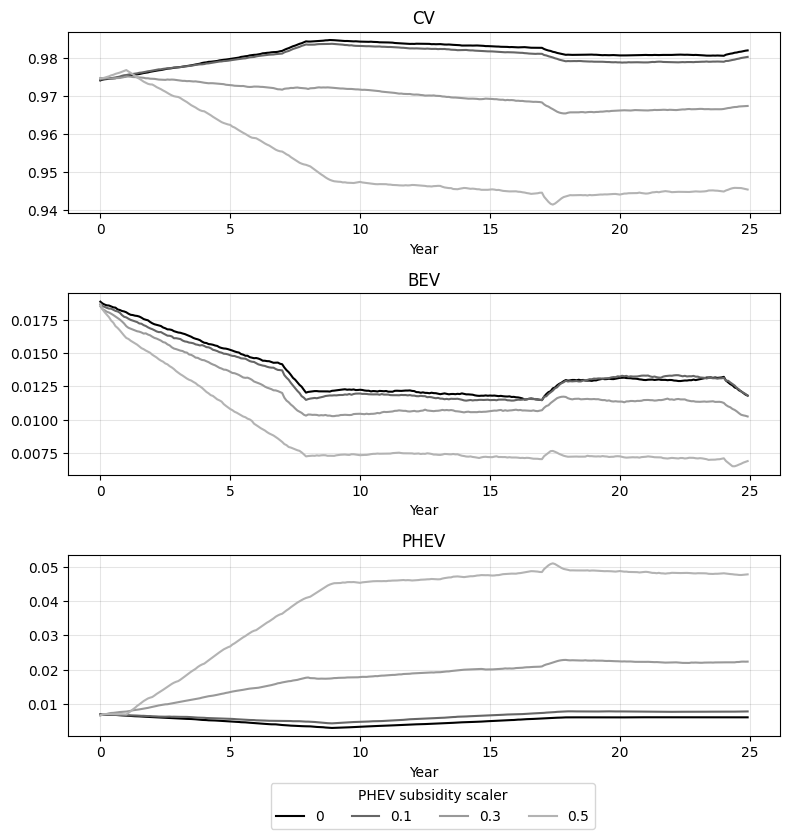

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(8, 8))
plot_check_by(values, axs)

fig.set_facecolor("white")

for ax in axs:
    ax.set_xlabel("Year")
    ax.grid(alpha=0.1)

axs[0].set_title(CV)
axs[1].set_title(EV)
axs[2].set_title(PHEV)
fig.tight_layout()
fig.legend(
    legend_labels,
    title="PHEV subsidity scaler",
    bbox_to_anchor=(12 / 16, -0.22),
    bbox_transform=axs[-1].transAxes,
    ncol=len(param),
)

save_in(name)
print(name)

EV jest typowe dla MC przy pierwszych krokach symulacji.
Przez nowość prawdopodobnie EV jest ponad stan infrastruktury.


In [7]:
# fig, axs = plt.subplots(nrows=3, figsize=(10, 9))

# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in CVs],
#     ax=axs[0],
#     color="c",
#     label="CV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in EVs],
#     ax=axs[1],
#     color="m",
#     label="EV",
#     alpha=0.3,
# )
# plot_intervals(
#     year / 12,
#     [trajectory / N for trajectory in PHEVs],
#     ax=axs[2],
#     color="y",
#     label="PHEV",
#     alpha=0.3,
# )


# axs[0].legend()
# axs[1].legend()
# axs[2].legend()

# axs[0].set_title("CV")
# axs[1].set_title("EV")
# axs[2].set_title("PHEV")

# fig.suptitle("constatnt prices, government build chargers stations", fontsize=16)